# Kowariancja i korelacja

https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a

In [80]:
import numpy as np
import pandas as pd

import seaborn as sns

from scipy import stats as sps

import matplotlib.pyplot as plt

In [117]:
a1 = np.array([2, 3, 4, 5])
a2 = np.array(list(reversed([3, 5, 5, 9])))

In [118]:
np.mean((a1 - np.mean(a1))*(a2 - np.mean(a2)))

-2.25

In [119]:
np.cov(a1, a2, ddof=0)[1,0] / np.sqrt(np.var(a1)*np.var(a2))

-0.9233805168766388

In [125]:
pd.DataFrame([a1, a2]).T.corr()

0         1
0  1.000000 -0.923381
1 -0.923381  1.000000

## Korelacja dwóch zmiennych niezależnych

In [184]:
a1 = sps.norm.rvs(size=1000)
a2 = sps.norm.rvs(size=1000)

Korelacja: -3.23%


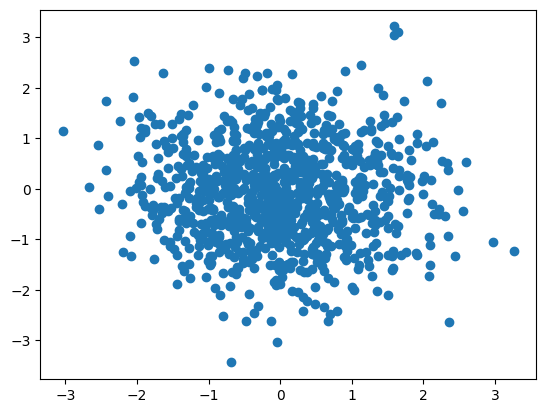

In [185]:
plt.scatter(x=a1,y=a2);
print(f"Korelacja: {pd.DataFrame([a1, a2]).T.corr().loc[0, 1]:.2%}")

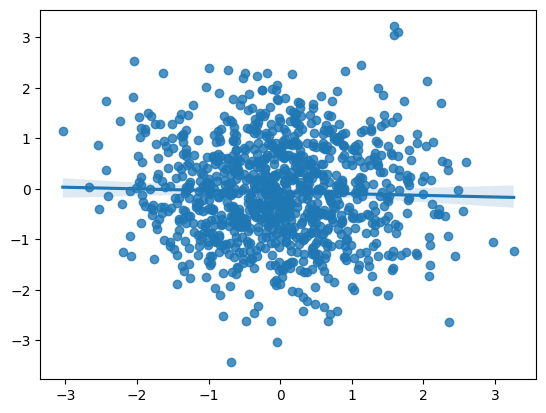

In [186]:
sns.regplot(x=a1, y=a2);

## Korelacja dwóch zmiennych (prawie) zależnych

In [181]:
a1 = sps.norm.rvs(loc=500, scale=20, size=1000)
a2 = a1 + sps.norm.rvs(loc=0, scale=20, size=1000) # Dodanie szumu do zmiennej

Korelacja: 70.95%


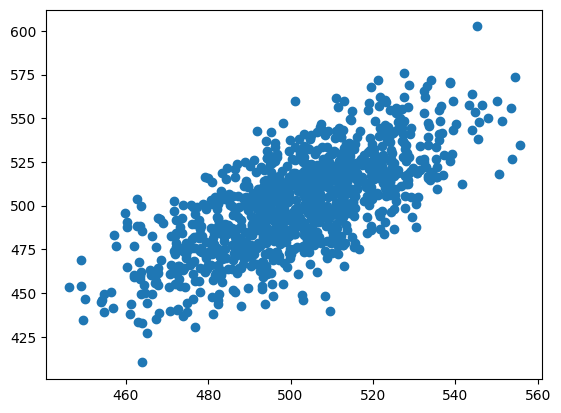

In [182]:
plt.scatter(x=a1, y=a2);
print(f"Korelacja: {pd.DataFrame([a1, a2]).T.corr().loc[0, 1]:.2%}")

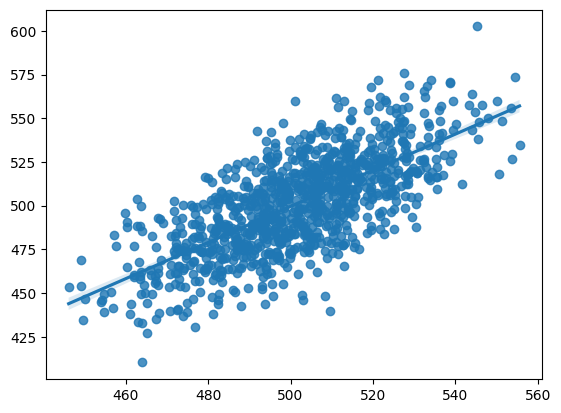

In [183]:
sns.regplot(x=a1, y=a2);

## Analiza zbioru danych (korelacja Pearsona)

In [173]:
data = pd.read_csv("../data/napoje.csv", sep=';')

In [160]:
cov = np.mean((data['pepsi'] - np.mean(data['pepsi']))*(data['fanta'] - np.mean(data['fanta'])))

In [161]:
cov / (np.sqrt(np.var(data['pepsi'])*(np.var(data['fanta']))))

0.20318468412573829

In [162]:
np.cov(data['pepsi'], data['fanta'], ddof=0)

array([[28998088.35869683,  5685270.05745443],
       [ 5685270.05745443, 26999199.8141276 ]])

In [163]:
data[['pepsi', 'fanta']].corr()

pepsi     fanta
pepsi  1.000000  0.203185
fanta  0.203185  1.000000

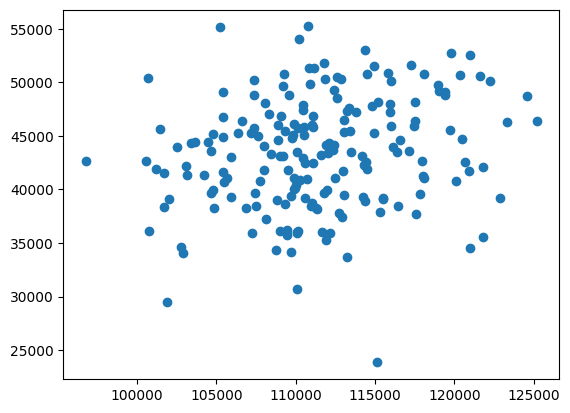

In [164]:
plt.scatter(x=data['pepsi'],y=data['fanta']);

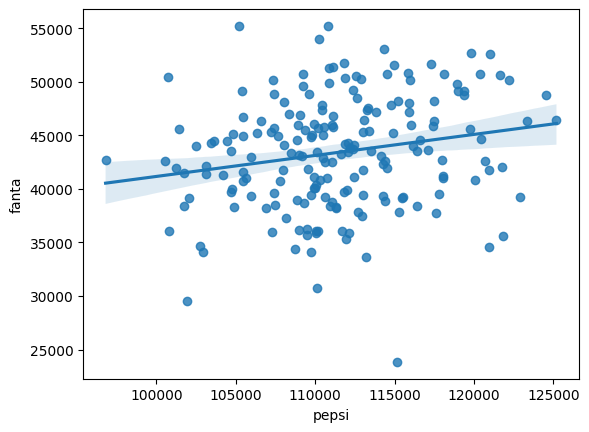

In [174]:
sns.regplot(x=data['pepsi'],y=data['fanta']);

In [189]:
cols = ['pepsi', 'fanta', 'żywiec', 'okocim', 'regionalne', 'cola', 'lech']

In [200]:
data[cols].corr()

pepsi     fanta    żywiec    okocim  regionalne      cola  \
pepsi       1.000000  0.203185  0.026878  0.107167   -0.046138 -0.024217   
fanta       0.203185  1.000000  0.050518  0.054096   -0.004915 -0.073571   
żywiec      0.026878  0.050518  1.000000  0.021363   -0.076077 -0.063147   
okocim      0.107167  0.054096  0.021363  1.000000    0.034082  0.016133   
regionalne -0.046138 -0.004915 -0.076077  0.034082    1.000000  0.089247   
cola       -0.024217 -0.073571 -0.063147  0.016133    0.089247  1.000000   
lech       -0.061948 -0.019197  0.043483  0.027080    0.019794 -0.062341   

                lech  
pepsi      -0.061948  
fanta      -0.019197  
żywiec      0.043483  
okocim      0.027080  
regionalne  0.019794  
cola       -0.062341  
lech        1.000000

In [196]:
data[cols].corr().style.format("{:.2%}")

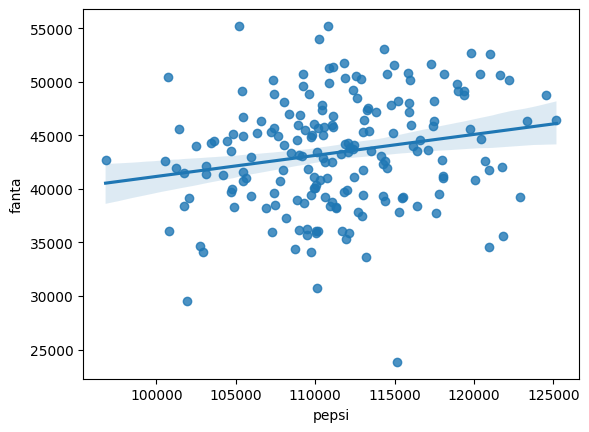

In [201]:
sns.regplot(x=data['pepsi'],y=data['fanta']);

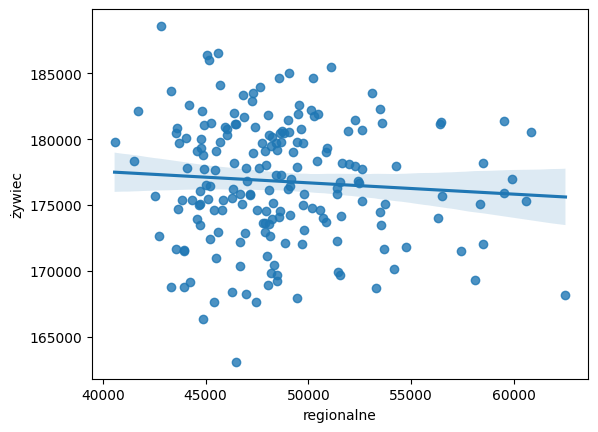

In [202]:
sns.regplot(x=data['regionalne'],y=data['żywiec']);

## Analiza zbioru danych (korelacja Spearmana)

In [207]:
data = pd.read_csv("../data/pracownicy.csv", encoding='cp1250', sep=';')

In [214]:
# data.shape

In [213]:
# data.describe()

In [245]:
data[['stazpracy', 'roczne']].corr(method='pearson')

stazpracy    roczne
stazpracy   1.000000  0.119369
roczne      0.119369  1.000000

In [246]:
data[['stazpracy', 'roczne']].corr(method='spearman')

stazpracy    roczne
stazpracy   1.000000  0.117753
roczne      0.117753  1.000000

In [242]:
a1 = np.array([2, 3, 4, 5])
a2 = np.array(list([-1000, 5, 9, 10000]))
pd.DataFrame([a1, a2]).T.corr(method='pearson')

0        1
0  1.00000  0.82158
1  0.82158  1.00000

In [243]:
pd.DataFrame([a1, a2]).T.corr(method='spearman')

0    1
0  1.0  1.0
1  1.0  1.0

In [279]:
data1 = data[data['wyksztalcenie'].str[0].astype(int).eq(1)] # 1-podstawowe
data2 = data[data['wyksztalcenie'].str[0].astype(int).eq(2)] # 2-średnie
data3 = data[data['wyksztalcenie'].str[0].astype(int).eq(3)] # 3-licencjat
data4 = data[data['wyksztalcenie'].str[0].astype(int).eq(4)] # 4-wyższe

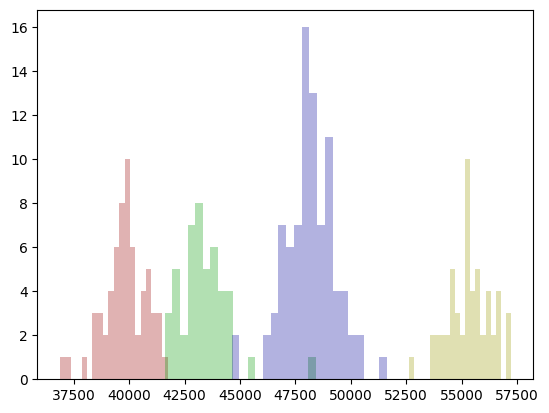

In [280]:
plt.hist(data1['roczne'], bins=20, alpha=0.3, color=[(0.6, 0, 0)]);
plt.hist(data2['roczne'], bins=20, alpha=0.3, color=[(0, 0.6, 0)]);
plt.hist(data3['roczne'], bins=20, alpha=0.3, color=[(0, 0, 0.6)]);
plt.hist(data4['roczne'], bins=20, alpha=0.3, color=[(0.6, 0.6, 0)]);

In [276]:
alpha = 0.05

ks_results = sps.kstest(data1['roczne'], data2['roczne'])
if ks_results.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={ks_results.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={ks_results.pvalue:.4%})")

Odrzucamy hipotezę H_0 (p-value=0.0000%)


In [277]:
ks_results.statistic

1.0